https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ja#%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%83%A2%E3%83%87%E3%83%AB%E3%82%92%E6%A7%8B%E7%AF%89%E3%81%99%E3%82%8B

- trainデータ
  - X_train: 手書き数字の白黒画像 60,000枚 - {xi∈R28×28}i=1∼60000
  - y_train: 手書き数字のラベル 60,000個 - {yi∈[0,1,…,9]}i=1∼60000
- testデータ
  - X_test: 手書き数字の白黒画像 10,000枚 - {xi∈R28×28}i=1∼10000
  - y_test: 手書き数字のラベル 10,000個 - {yi∈[0,1,…,9]}i=1∼10000

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(f'TensorFlow version: {tf.__version__}')

TensorFlow version: 2.17.0


In [2]:
# data set -> x_train, y_train, x_test, y_test -> normalize
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
for x in x_train[1]:
    for i in x:
        if i != 0:
            print('o', end=' ')
        else:
            print('-', end=' ')
    print()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - o o o o o - - - - - - - - 
- - - - - - - - - - - - - - o o o o o o - - - - - - - - 
- - - - - - - - - - - - - o o o o o o o o o - - - - - - 
- - - - - - - - - - - o o o o o o o o o o o - - - - - - 
- - - - - - - - - - - o o o o o o o o o o o - - - - - - 
- - - - - - - - - - o o o o o o o o o o o o - - - - - - 
- - - - - - - - - o o o o o o o o o - - o o o - - - - - 
- - - - - - - - o o o o o o - - - - - - o o o - - - - - 
- - - - - - - o o o o o o o - - - - - - o o o - - - - - 
- - - - - - - o o o o - - - - - - - - - o o o - - - - - 
- - - - - - - o o o - - - - - - - - - - o o o - - - - - 
- - - - - - o o o o - - - - - - - - - - o o o - - - - - 
- - - - - - o o o o - - - - - - - - o o o o o - - - - - 
- - - - - - o o o - - - - - - -

In [4]:
for y in y_train:
    print(y, end=', ')

5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6, 7, 2, 0, 3, 5, 4, 3, 6, 5, 8

In [5]:
for x in x_test[1]:
    for i in x:
        if i != 0:
            print('o', end=' ')
        else:
            print('-', end=' ')
    print()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - - - - - - - - - - - - - - - - - - - 
- - - - - - - - - - o o o o o o o - - - - - - - - - - - 
- - - - - - - - - o o o o o o o o o - - - - - - - - - - 
- - - - - - - - o o o o o o o o o o - - - - - - - - - - 
- - - - - - - o o o o o o - o o o o - - - - - - - - - - 
- - - - - - - o o o o - - - o o o o - - - - - - - - - - 
- - - - - - - - o o - - - - o o o o - - - - - - - - - - 
- - - - - - - - - - - - - o o o o o - - - - - - - - - - 
- - - - - - - - - - - - o o o o o - - - - - - - - - - - 
- - - - - - - - - - - - o o o o - - - - - - - - - - - - 
- - - - - - - - - - - o o o o o - - - - - - - - - - - - 
- - - - - - - - - - o o o o o - - - - - - - - - - - - - 
- - - - - - - - - - o o o o - - - - - - - - - - - - - - 
- - - - - - - - - o o o o o - - - - - - - - - - - - - - 
- - - - - - - - o o o o o - - - - - - - - - - - - - - - 
- - - - - - - - o o o o o - - -

In [6]:
for y in y_test:
    print(y, end=', ')

7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 5

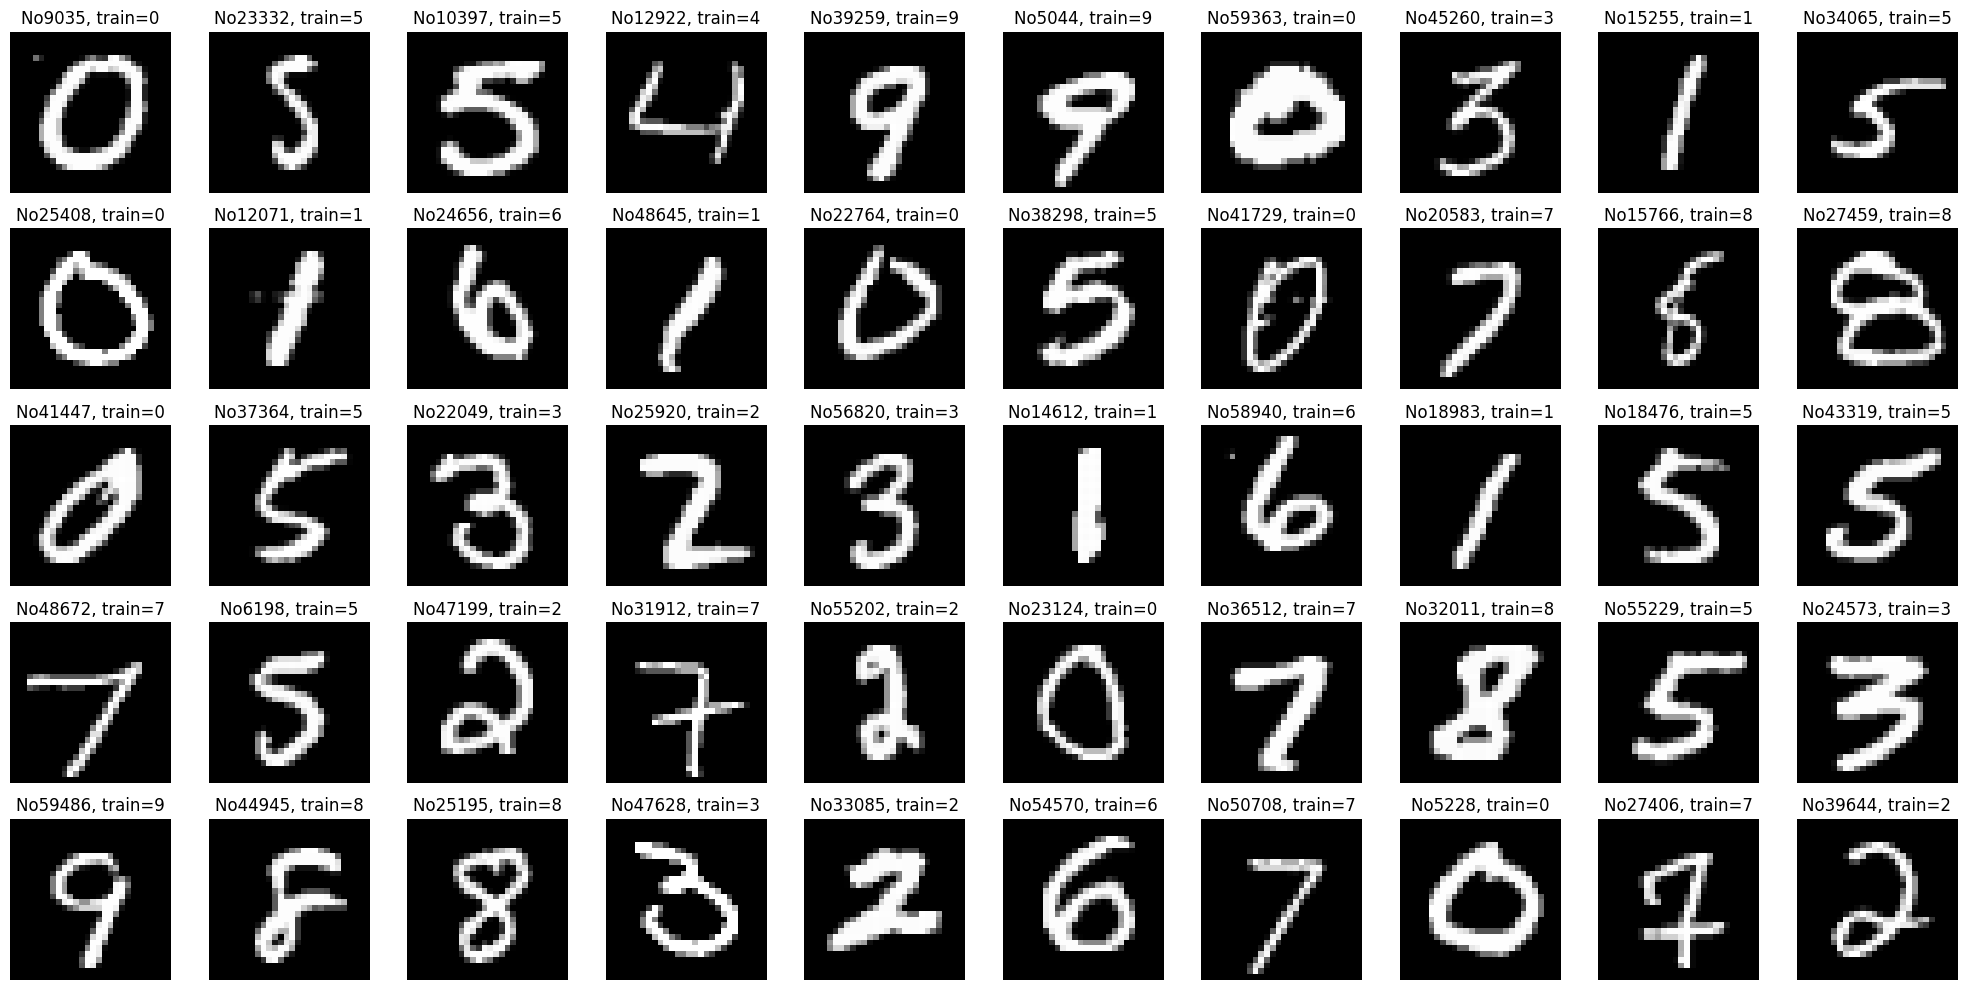

In [7]:
# train data display
row, col = 5, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
for i in range(row):
    for j in range(col):
        num = np.random.randint(0, 60000)
        axs[i][j].imshow(x_train[num], cmap="gray")
        axs[i][j].set_title(f'No{num}, train={y_train[num]}')
        axs[i][j].axis("off")
plt.tight_layout()
plt.show()

In [8]:
# CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
])
model.summary()

c:\Users\JY810251\python\blow_prediction\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
predictons = model(x_train[:1]).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictons).numpy()

2.4894342

In [47]:
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

CSV_FILE_PATH = "tensorflow_test_01.csv"
callbacks = []
callbacks.append(tf.keras.callbacks.CSVLogger(CSV_FILE_PATH))

model.fit(
    x_train,
    y_train,
    batch_size=100,
    epochs=5,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=callbacks,
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8176 - loss: 0.6339 - val_accuracy: 0.9470 - val_loss: 0.1788
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9450 - loss: 0.1882 - val_accuracy: 0.9643 - val_loss: 0.1220
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9600 - loss: 0.1355 - val_accuracy: 0.9689 - val_loss: 0.0985
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9665 - loss: 0.1124 - val_accuracy: 0.9728 - val_loss: 0.0901
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9723 - loss: 0.0928 - val_accuracy: 0.9750 - val_loss: 0.0812


In [48]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9750 - loss: 0.0812


In [61]:
df_loss = pd.read_csv(CSV_FILE_PATH)
df_loss.head(3)

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.893300,0.376648,0.9470,0.178831
1,1,0.947533,0.179307,0.9643,0.122045
2,2,0.960633,0.132796,0.9689,0.098483


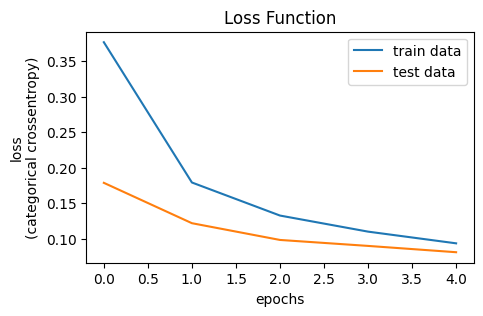

In [62]:
plt.figure(figsize=(5, 3))
plt.plot(df_loss['epoch'], df_loss['loss'], label="train data")
plt.plot(df_loss['epoch'], df_loss['val_loss'], label="test data")
plt.xlabel("epochs")
plt.ylabel("loss\n(categorical crossentropy)")
plt.title('Loss Function')
plt.legend(loc="upper right")
plt.show()

In [63]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
df = pd.DataFrame(probability_model(x_test))

In [64]:
df['prob'] = df.iloc[:, 0:9].idxmax(axis=1)
df['y_test'] = y_test
df.head(3)

,0,1,2,3,4,5,6,7,8,9,prob,y_test
0,6.221799e-07,9.578397e-08,0.000093,0.000400,3.886321e-10,6.536783e-07,2.328536e-12,9.994932e-01,4.637417e-07,1.185630e-05,7,7
1,2.847404e-07,1.475926e-03,0.998188,0.000313,6.687256e-13,2.105777e-06,2.200575e-06,6.041761e-11,1.812174e-05,2.497637e-11,2,2
2,3.201491e-06,9.949657e-01,0.001381,0.000179,1.746056e-04,5.855642e-05,1.699311e-04,2.685294e-03,3.719626e-04,1.083495e-05,1,1


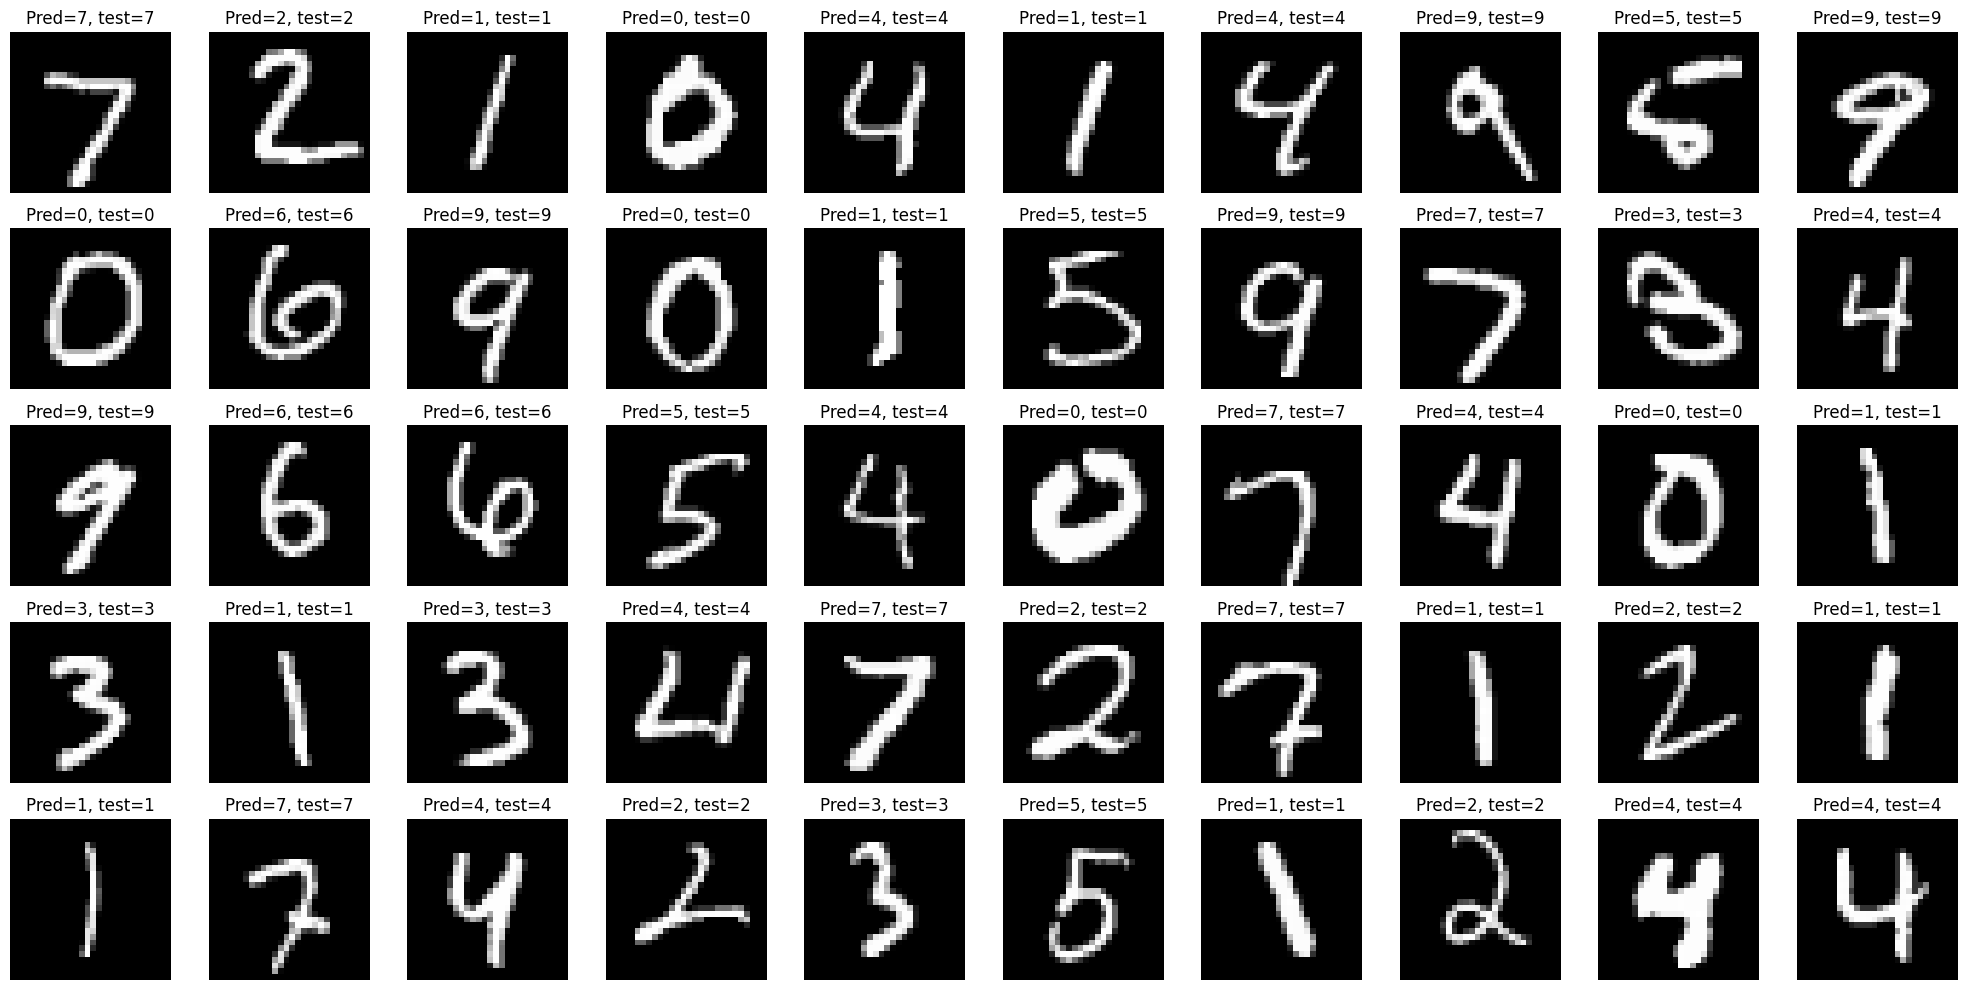

In [65]:
row, col = 5, 10
fig, axs = plt.subplots(row, col, figsize=(col*2, row*2))
num = 0
for i in range(row):
    for j in range(col):
        axs[i][j].imshow(x_test[num], cmap="gray")
        pred = df.iloc[num, :-2].idxmax()
        y_ = y_test[num]
        axs[i][j].set_title(f'Pred={pred}, test={y_}')
        if pred != y_:
            axs[i][j].set_title(f'Pred={pred}, test={y_}', color='r')
        num += 1
        axs[i][j].axis('off')
plt.tight_layout()
plt.show()

In [67]:
df[df['prob'] != df['y_test']]

,0,1,2,3,4,5,6,7,8,9,prob,y_test
7,2.441103e-06,1.263302e-04,3.064897e-04,0.001779,0.012918,5.800113e-05,2.966003e-06,0.003607,0.000070,0.981129,4,9
9,6.990996e-08,5.827414e-10,1.585856e-07,0.000032,0.003013,8.596155e-08,4.127767e-09,0.003078,0.000043,0.993833,7,9
12,4.503697e-08,3.968757e-08,3.486785e-06,0.000065,0.000381,5.348650e-06,2.904989e-08,0.000551,0.000008,0.998987,7,9
16,3.136562e-06,1.999763e-09,1.314394e-05,0.000007,0.000499,1.062689e-06,4.168836e-08,0.001716,0.000014,0.997746,7,9
20,1.254695e-05,2.119663e-06,7.892579e-08,0.000403,0.001472,4.090298e-05,1.970191e-08,0.041000,0.000040,0.957028,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
9941,1.099946e-02,4.604033e-03,5.430053e-04,0.020760,0.000045,3.883963e-01,5.557994e-01,0.001121,0.017526,0.000206,6,5
9945,1.691901e-06,3.180653e-05,1.117891e-05,0.000043,0.018575,3.288909e-04,6.886007e-07,0.001712,0.000879,0.978416,4,9
9973,2.646706e-07,2.491267e-08,3.225151e-06,0.000016,0.003738,3.059152e-06,5.670376e-08,0.000457,0.000126,0.995656,4,9
9982,4.409962e-03,1.014633e-03,8.221631e-03,0.056872,0.000081,9.590524e-02,8.323354e-01,0.000313,0.000822,0.000025,6,5


In [72]:
# save model as keras instance
ins_path = 'tensorflow_test_02.h5'
model.save(ins_path)